In [70]:
from PyQt6.QtWidgets import QApplication, QFileDialog
import sys
import os
from glob import glob
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RectangleSelector
import seaborn as sns 

import cv2

import db_image_analysis as db

# Introduction

# Specify File Location

In [16]:
if 'app' not in globals():
    app = QApplication(sys.argv)

directory = QFileDialog.getExistingDirectory(None, "Select Directory")
print("Selected Directory:", directory)

Selected Directory: /Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data


# Import, Split into Channels, and Export Image

### Load JPG Image

In [72]:
files = sorted([file for file in glob(directory + "/IMG_*.jpg")])
files

['/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/IMG_6695_O2optode_0pc-airsat.jpg',
 '/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/IMG_6696_O2optode_10pc-airsat.jpg',
 '/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/IMG_6697_O2optode_25pc-airsat.jpg',
 '/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/IMG_6698_O2optode_50pc-airsat.jpg',
 '/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/IMG_6699_O2optode_80pc-airsat.jpg',
 '/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/IMG_6700_O2optode_100pc-airsat.jpg']

In [73]:
images = db.load_image_from_file(files)
print(f"{len(images)} image(s) loaded from {directory}")

6 image(s) loaded from /Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data


### Split into RGB Channels and Display Individual Channels 

In [74]:
image_channels = db.split_image_into_channels(images)
image_channels

{'IMG_6695_O2optode_0pc-airsat': (array([[26, 26, 25, ..., 18, 18, 19],
         [27, 27, 27, ..., 17, 18, 18],
         [28, 27, 26, ..., 16, 17, 18],
         ...,
         [84, 84, 80, ..., 35, 32, 33],
         [84, 84, 80, ..., 38, 31, 30],
         [84, 84, 79, ..., 39, 30, 29]], shape=(2196, 2939), dtype=uint8),
  array([[12, 12, 11, ...,  7,  7,  6],
         [13, 13, 13, ...,  6,  7,  7],
         [15, 14, 13, ...,  7,  8,  9],
         ...,
         [57, 57, 53, ..., 30, 27, 29],
         [57, 57, 53, ..., 33, 26, 26],
         [57, 57, 52, ..., 34, 25, 25]], shape=(2196, 2939), dtype=uint8),
  array([[ 9,  9,  8, ...,  1,  1,  0],
         [10, 10, 10, ...,  0,  1,  1],
         [ 9,  8,  7, ...,  0,  1,  2],
         ...,
         [30, 30, 26, ..., 26, 23, 26],
         [30, 30, 26, ..., 29, 22, 23],
         [30, 30, 25, ..., 30, 21, 22]], shape=(2196, 2939), dtype=uint8)),
 'IMG_6696_O2optode_10pc-airsat': (array([[26, 26, 25, ..., 18, 18, 19],
         [27, 27, 27, ..., 

Image IMG_6695_O2optode_0pc-airsat split into RGB channels
Image IMG_6696_O2optode_10pc-airsat split into RGB channels
Image IMG_6697_O2optode_25pc-airsat split into RGB channels
Image IMG_6698_O2optode_50pc-airsat split into RGB channels
Image IMG_6699_O2optode_80pc-airsat split into RGB channels
Image IMG_6700_O2optode_100pc-airsat split into RGB channels


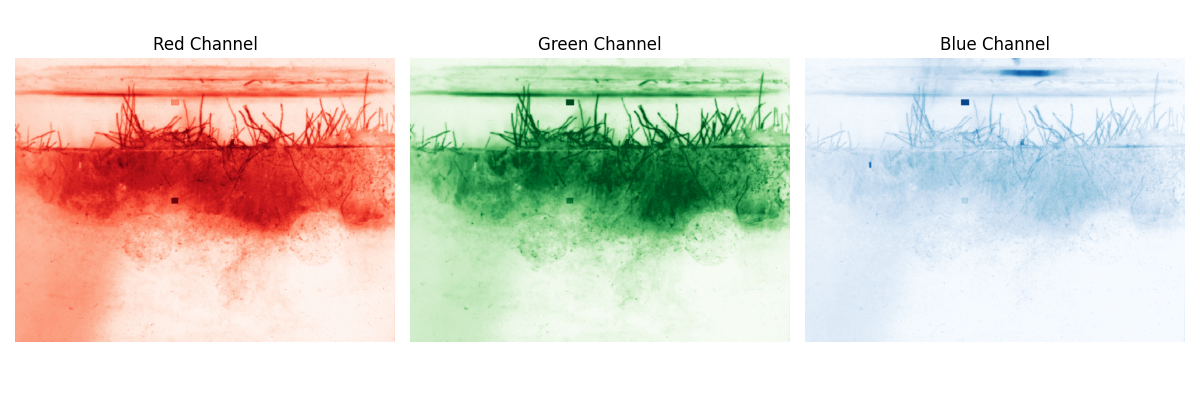

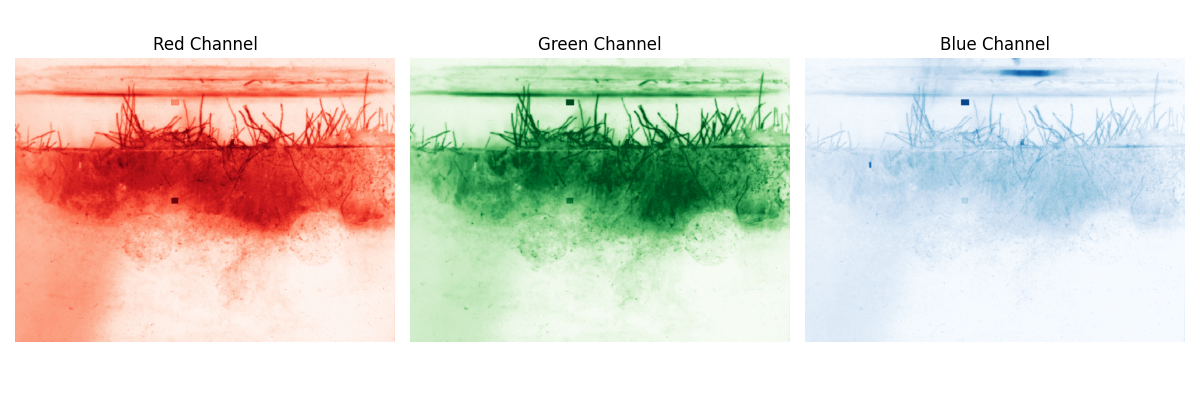

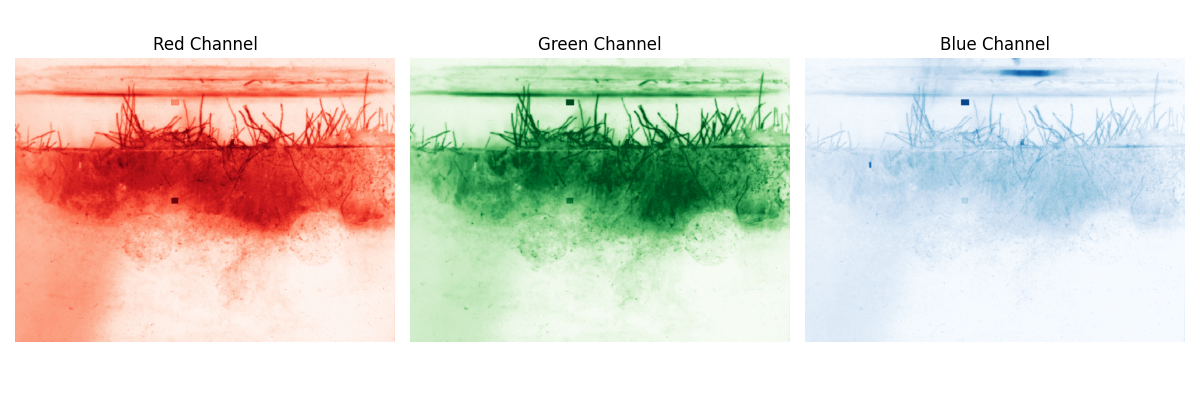

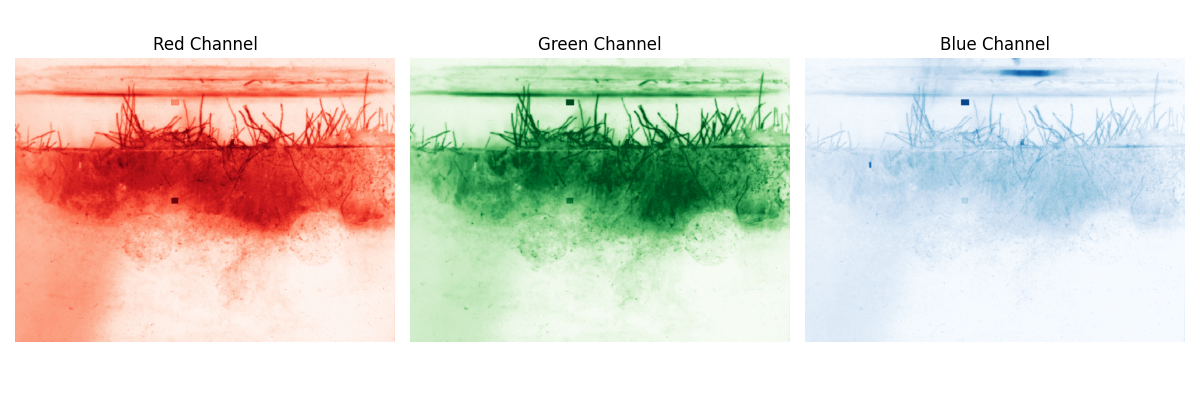

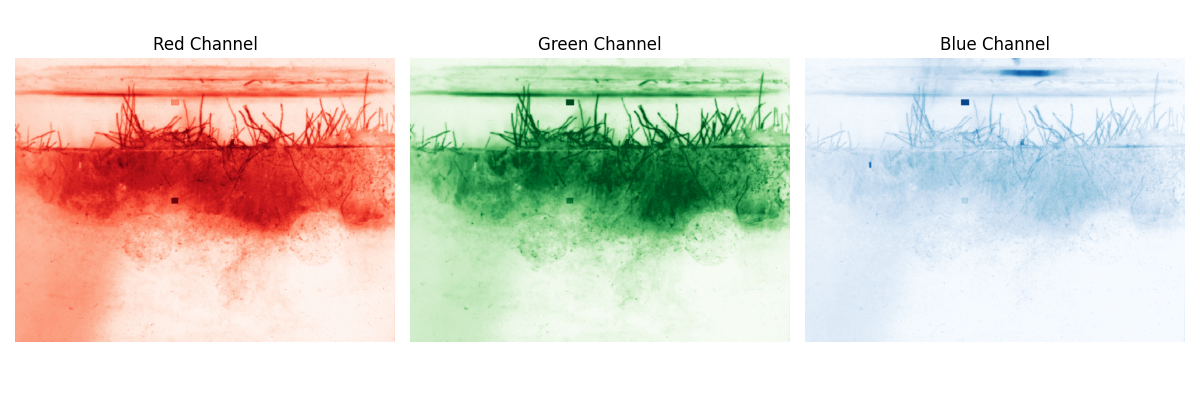

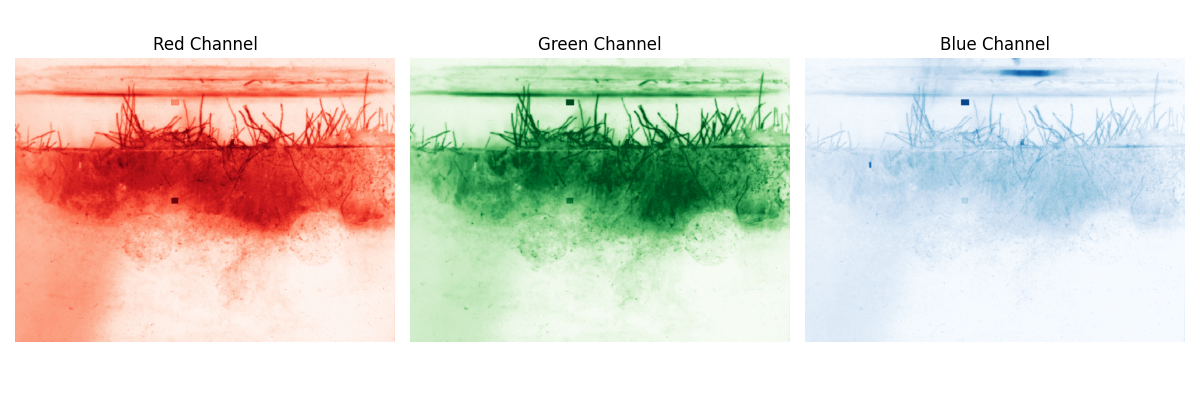

In [75]:
for image in image_channels.items():
    print(f"Image {image[0]} split into RGB channels")
    fig = db.display_channels_for_image(image[1][0], image[1][1], image[1][2])

## Export Image Channels Individually

In [76]:
for image in image_channels.items():
    cv2.imwrite(directory + f"/single_channels/{image[0]}_R.jpg", image[1][0])   
    cv2.imwrite(directory + f"/single_channels/{image[0]}_G1.jpg", image[1][1])
    cv2.imwrite(directory + f"/single_channels/{image[0]}_B.jpg", image[1][2])  

# Import Single Image Channels and Stack Images

In [77]:
# specify file location
images_R = sorted(glob(os.path.join(directory + "/single_channels/", "*_R.*")))
images_G1 = sorted(glob(os.path.join(directory + "/single_channels/", "*_G1.*")))

images_R

['/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/single_channels/IMG_6695_O2optode_0pc-airsat_R.jpg',
 '/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/single_channels/IMG_6696_O2optode_10pc-airsat_R.jpg',
 '/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/single_channels/IMG_6697_O2optode_25pc-airsat_R.jpg',
 '/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/single_channels/IMG_6698_O2optode_50pc-airsat_R.jpg',
 '/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/single_channels/IMG_6699_O2optode_80pc-airsat_R.jpg',
 '/Users/silviazieger/Python/enviPatable/Python_Intro+ImageAnalysis/data/single_channels/IMG_6700_O2optode_100pc-airsat_R.jpg']

In [78]:
# import single image channels and stack together
stack_R = db.load_and_stack(images_R)
stack_G1 = db.load_and_stack(images_G1)

# Calculate Image Channel Ratio

In [79]:
ratio_stack = db.calculate_channel_ratio(stack_R, stack_G1)

Stack_R shape: (6, 2196, 2939)
Stack_G1 shape: (6, 2196, 2939)

 >> Ratio stack computed with shape: (6, 2196, 2939)


# Display Image Stack

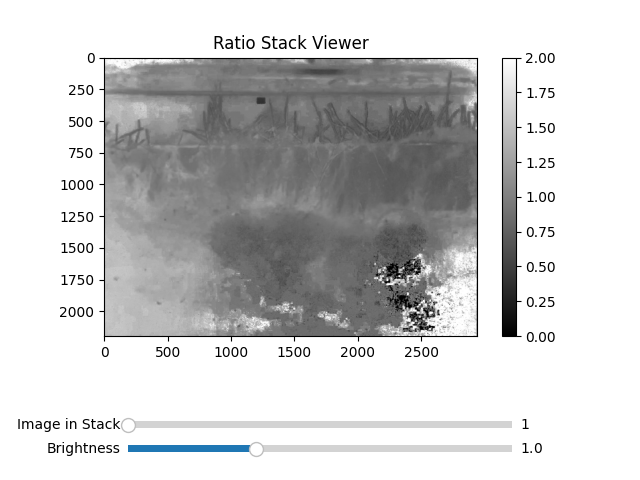

In [80]:
%matplotlib widget

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.3)  

img_display = ax.imshow(ratio_stack[0, :, :], vmin=0, vmax=2, cmap='grey')
plt.title("Ratio Stack Viewer")
plt.colorbar(img_display)

ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
slider = Slider(ax_slider, "Image in Stack", 1, ratio_stack.shape[0], valinit=0, valstep=1)

ax_brightness = plt.axes([0.2, 0.05, 0.6, 0.03])
brightness_slider = Slider(ax_brightness, "Brightness", 0.5, 2.0, valinit=1.0, valstep=0.05)

# ----------------------------------------------------------------------
def update(val):
    slice_index = int(slider.val)
    brightness = brightness_slider.val
    
    img_display.set_data(ratio_stack[slice_index, :, :] * brightness)
    fig.canvas.draw_idle() 
# ----------------------------------------------------------------------

slider.on_changed(update)
brightness_slider.on_changed(update)

plt.show()

# Select Regions of Interest (RoIs)

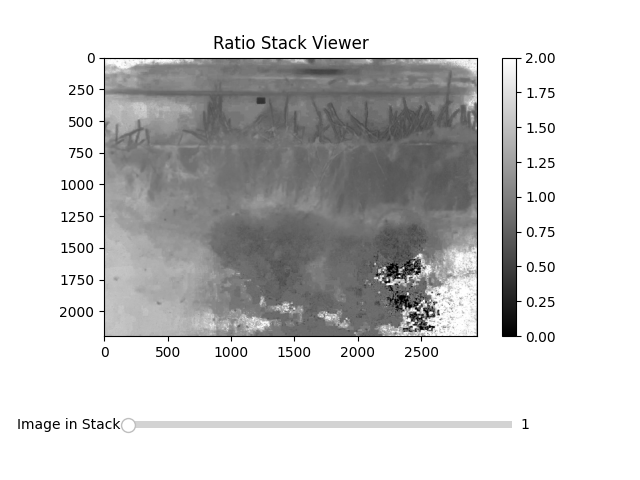

Selected RoI 0: (1149, 1346, 1390, 1540)
Selected RoI 1: (2032, 2159, 917, 1122)
Selected RoI 2: (1607, 1843, 1406, 1596)
Selected RoI 3: (652, 881, 783, 886)
Selected RoI 4: (2474, 2608, 767, 893)
Selected RoI 5: (565, 644, 113, 184)


In [81]:
%matplotlib widget

selected_region = []
roi_no = 0
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.3)
plt.title("Ratio Stack Viewer")

img_display = ax.imshow(ratio_stack[0, :, :], vmin=0, vmax=2, cmap='gray')
plt.colorbar(img_display)

ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
slider = Slider(ax_slider, "Image in Stack", 1, ratio_stack.shape[0], valinit=0, valstep=1)

# ------------------------------------------------------------------------------------------
def update(val):
    slice_index = int(slider.val-1)
    img_display.set_data(ratio_stack[slice_index, :, :])
    fig.canvas.draw_idle()

def on_select(eclick, erelease):
    global selected_region, roi_no
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)
    
    # Store coordinates (xmin, xmax, ymin, ymax)
    RoI = (min(x1, x2), max(x1, x2), min(y1, y2), max(y1, y2))
    selected_region.append(RoI)
    print(f"Selected RoI {roi_no}: {RoI}") 
    roi_no += 1

    ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=1))
    fig.canvas.draw_idle()
# ------------------------------------------------------------------------------------------

selector = RectangleSelector(ax, on_select, interactive=True)
slider.on_changed(update)
brightness_slider.on_changed(update)

plt.show()

#### Get RoIs from Image

In [82]:
images_roi = dict()
for image_no in range(ratio_stack.shape[0]):
    image_cropt = []
    
    for RoI in selected_region:
        x1, x2, y1, y2 = RoI
        image_cropt.append(ratio_stack[image_no, y1:y2, x1:x2]) 
    
    images_roi[image_no] = image_cropt

#### Get Mean and STD of all RoIs

In [83]:
df = db.get_metric_of_roi(images_roi)
df

mean       STS
0 roi1  0.751620  0.048560
  roi2  0.768782  0.026306
  roi3  0.831146  0.050476
  roi4  0.950444  0.050082
  roi5  0.741034  0.027013
  roi6  1.105680  0.046150
1 roi1  0.751620  0.048560
  roi2  0.768782  0.026306
  roi3  0.831146  0.050476
  roi4  0.950444  0.050082
  roi5  0.741034  0.027013
  roi6  1.105680  0.046150
2 roi1  0.751620  0.048560
  roi2  0.768782  0.026306
  roi3  0.831146  0.050476
  roi4  0.950444  0.050082
  roi5  0.741034  0.027013
  roi6  1.105680  0.046150
3 roi1  0.751620  0.048560
  roi2  0.768782  0.026306
  roi3  0.831146  0.050476
  roi4  0.950444  0.050082
  roi5  0.741034  0.027013
  roi6  1.105680  0.046150
4 roi1  0.751620  0.048560
  roi2  0.768782  0.026306
  roi3  0.831146  0.050476
  roi4  0.950444  0.050082
  roi5  0.741034  0.027013
  roi6  1.105680  0.046150
5 roi1  0.751620  0.048560
  roi2  0.768782  0.026306
  roi3  0.831146  0.050476
  roi4  0.950444  0.050082
  roi5  0.741034  0.027013
  roi6  1.105680  0.046150

If prefered, one can update the image name from a running number to the analyte concentration. 
This can either be done manually or by extracting the concentration from the name (preferred).

In my dummy case, the file path looks something like:

```<directory for main folder>/data/IMG_6695_O2optode_10pc-airsat.jpg```

The concentration information is stored as an integer right before 'pc-airsat' (meaning %air saturation).
Hence, I slice the string before and after this integer using the keywords _'pc'_ and 'optode_'.
Then, the string is converted into an integer

In [84]:
strings_concentration = [file_name.split('pc')[0].split('optode_')[1] for file_name in files]
concentration = [int(i) for i in strings_concentration]
concentration

[0, 10, 25, 50, 80, 100]

Since we didn't change the order of the files yet, you can update the index of your dataframe _df_. Only be aware that it is a multiindex - meaning each index is a tuple containing the image number and mean of the RoIs as a tuple (image_nr, RoI_av). 

> We only want to upadte the image_nr with the concentration but keep the RoI_av.

In [85]:
# we first create a map to link the image_nr with the concentration
concentration_map = dict(zip(df.index.levels[0].to_list(), concentration))
concentration_map

{0: 0, 1: 10, 2: 25, 3: 50, 4: 80, 5: 100}

In [86]:
# now we can easily update the index
df.index = df.index.set_levels(df.index.levels[0].to_series().map(concentration_map), level=0)
df

mean       STS
0   roi1  0.751620  0.048560
    roi2  0.768782  0.026306
    roi3  0.831146  0.050476
    roi4  0.950444  0.050082
    roi5  0.741034  0.027013
    roi6  1.105680  0.046150
10  roi1  0.751620  0.048560
    roi2  0.768782  0.026306
    roi3  0.831146  0.050476
    roi4  0.950444  0.050082
    roi5  0.741034  0.027013
    roi6  1.105680  0.046150
25  roi1  0.751620  0.048560
    roi2  0.768782  0.026306
    roi3  0.831146  0.050476
    roi4  0.950444  0.050082
    roi5  0.741034  0.027013
    roi6  1.105680  0.046150
50  roi1  0.751620  0.048560
    roi2  0.768782  0.026306
    roi3  0.831146  0.050476
    roi4  0.950444  0.050082
    roi5  0.741034  0.027013
    roi6  1.105680  0.046150
80  roi1  0.751620  0.048560
    roi2  0.768782  0.026306
    roi3  0.831146  0.050476
    roi4  0.950444  0.050082
    roi5  0.741034  0.027013
    roi6  1.105680  0.046150
100 roi1  0.751620  0.048560
    roi2  0.768782  0.026306
    roi3  0.831146  0.050476
    roi4  0.950444  0.050082
    roi5  0.741034  0.027013
    roi6  1.105680  0.046150

### Save RoI information (mean, std) as txt file

In [87]:
# to avoid overwriting, we use the current timestamp to save the RoI information
# the form is yyyymmdd_hhmm (without seconds as this would be overkill)
time_of_saving = datetime.now().strftime("%Y%m%d_%H%m")
time_of_saving

'20250312_1003'

In [88]:
df.to_csv(f"{'/'.join(directory.split('/')[:-1])}/results/{time_of_saving}_roi_selected.txt") 